# Xây dựng cây quyết định và rừng cây trên dữ liệu bệnh tiểu đường.

In [1]:
# import libraries
import numpy as np                 
import pandas as pd               
import matplotlib.pyplot as plt    
import seaborn as sns

from sklearn.model_selection import train_test_split   
from sklearn.model_selection import GridSearchCV     
from sklearn import tree                            
from sklearn.ensemble import RandomForestClassifier    
from sklearn.metrics import accuracy_score, roc_auc_score

#### Nạp dữ liệu

In [9]:
df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Tiền xử lý

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Danh sách các cột cần làm sạch
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_clean:
    # Lấy giá trị trung bình (chỉ tính các giá trị không phải 0)
    # df[col] != 0 là điều kiện lọc, .mean() là tính trung bình
    col_mean = df[col][df[col] != 0].mean()
    
    # Thay thế các giá trị 0 bằng giá trị trung bình
    df[col] = df[col].replace(0, col_mean)
    
    print(f"Đã thay thế giá trị 0 trong cột '{col}' bằng {col_mean:.2f}")

Đã thay thế giá trị 0 trong cột 'Glucose' bằng 121.69
Đã thay thế giá trị 0 trong cột 'BloodPressure' bằng 72.41
Đã thay thế giá trị 0 trong cột 'SkinThickness' bằng 29.15
Đã thay thế giá trị 0 trong cột 'Insulin' bằng 155.55
Đã thay thế giá trị 0 trong cột 'BMI' bằng 32.46


In [15]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


#### Chuẩn bị dữ liệu cho tập train và test

In [18]:
# Xác định cột mục tiêu và cột đặc trưng
target = 'Outcome'
# Lấy tất cả các cột TRỪ cột 'Outcome'
features = df.drop(target, axis=1).columns.tolist()

# Tách X (features) và y (target)
X = df[features].values
y = df[target].values

# Chia dữ liệu: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       
    random_state=24      
)

#### Xây dựng cây quyết định

In [ ]:
# 1. Tạo Cây quyết định
# Tạo 1 cây đơn giản với max_depth=3 để xem thử
dt_simple = tree.DecisionTreeClassifier(max_depth=3)
dt_simple.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
# 2. Tối ưu Cây quyết định 
# Chúng ta sẽ dùng GridSearchCV để tìm 'max_depth' tốt nhất
dt = tree.DecisionTreeClassifier()
params = {'max_depth': [2, 3, 4, 5, 6, 8, 10, 12]} 

cv_dt = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=4, verbose=1)
cv_dt.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [2, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [21]:
# Lấy ra mô hình tốt nhất
best_dt = cv_dt.best_estimator_

#### Xây dựng rừng cây

In [22]:
# Tạo mô hình Rừng cây 
rf = RandomForestClassifier(random_state=4) 

# Xác định lưới tham số để tìm kiếm 
# Tìm số cây (n_estimators) từ 10 đến 100
rf_params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
# Tạo đối tượng GridSearchCV
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='accuracy', cv=4, verbose=1) 
cv_rf.fit(X_train, y_train) 

print(f"Tham số n_estimators tốt nhất tìm được: {cv_rf.best_params_}")
print(f"Độ chính xác (Accuracy) tốt nhất trên tập test: {cv_rf.score(X_test, y_test):.4f}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Tham số n_estimators tốt nhất tìm được: {'n_estimators': 10}
Độ chính xác (Accuracy) tốt nhất trên tập test: 0.7403


In [23]:
# Lấy ra mô hình tốt nhất
best_rf = cv_rf.best_estimator_

#### Đánh giá mô hình

In [27]:
# Lấy độ quan trọng của các đặc trưng từ mô hình tốt nhất 
importances = best_rf.feature_importances_

# Tạo DataFrame để xem cho dễ 
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
print(feat_imp_df)

                    Feature  Importance
1                   Glucose    0.296286
5                       BMI    0.164539
7                       Age    0.116913
6  DiabetesPedigreeFunction    0.101938
4                   Insulin    0.090938
0               Pregnancies    0.084231
2             BloodPressure    0.072826
3             SkinThickness    0.072329


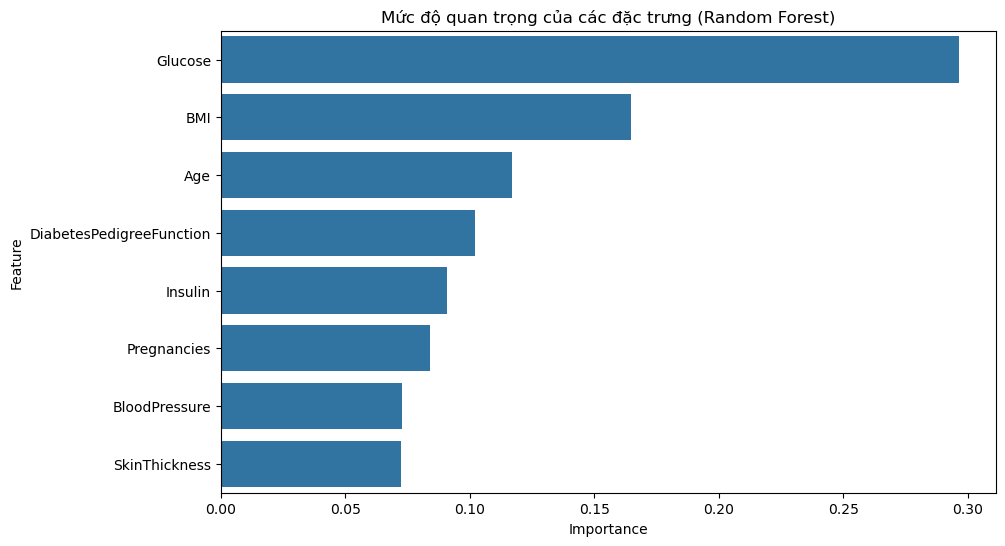

In [28]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Mức độ quan trọng của các đặc trưng (Random Forest)')
plt.show()

Kết thúc